<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/Profissao_Cientista_de_Dados_M10_support_material_assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento de aplicações com Python/Descritiva II - Análise descritiva para resposta contínuaome/Profissao- Cientista de Dados_M10_support material.csv')
data.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


**1- Análise da variável dependente: Possui imovél**

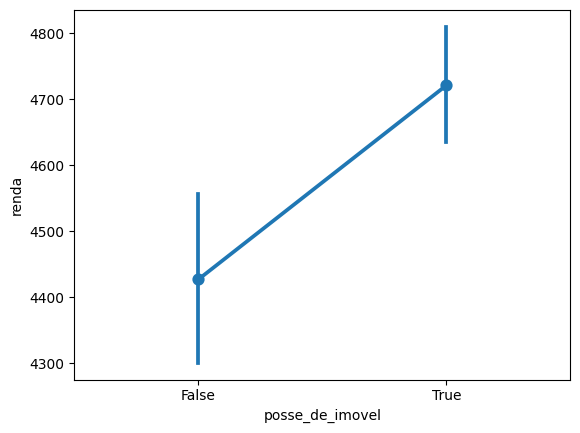

In [16]:
ax = sns.pointplot(x="posse_de_imovel", y="renda",
                   data=data, dodge=True)

**2- Análise da variável dependente: Possui veículo**

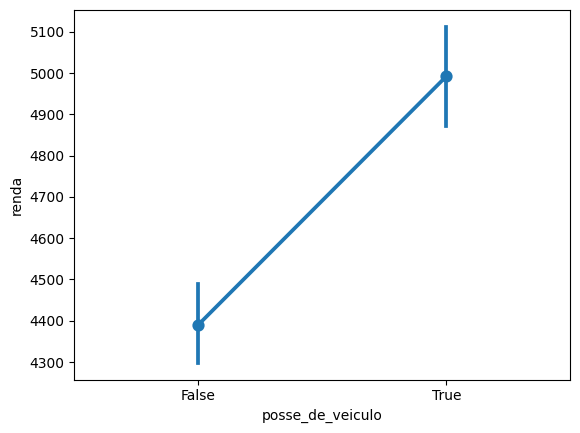

In [21]:
ax = sns.pointplot(x="posse_de_veiculo", y="renda",
                   data=data, dodge=True)

**3- Alguma delas parece discriminar renda de forma estatisticamente significante?**

In [27]:
# Testes de significância
veiculo_test = stats.ttest_ind(
    data.loc[data['posse_de_veiculo'] == True, 'renda'],
    data.loc[data['posse_de_veiculo'] == False, 'renda'],
    equal_var=False
)

imovel_test = stats.ttest_ind(
    data.loc[data['posse_de_imovel'] == True, 'renda'],
    data.loc[data['posse_de_imovel'] == False, 'renda'],
    equal_var=False
)

imovel_test, veiculo_test

(TtestResult(statistic=3.677635545954218, pvalue=0.00023665092205816239, df=9914.341210708615),
 TtestResult(statistic=7.712332220715903, pvalue=1.3324346963629966e-14, df=12047.14260526655))

**Ambas as variáveis podem ser consideradas boas preditoras da renda, pois apresentam diferenças significativas entre os grupos, com destaque para posse de veículo, que exibe um p-valor ainda menor.**

